In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import math
import pylab
import scipy.stats as stats


In [24]:
df = pd.read_csv('Housing.csv')

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [25]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


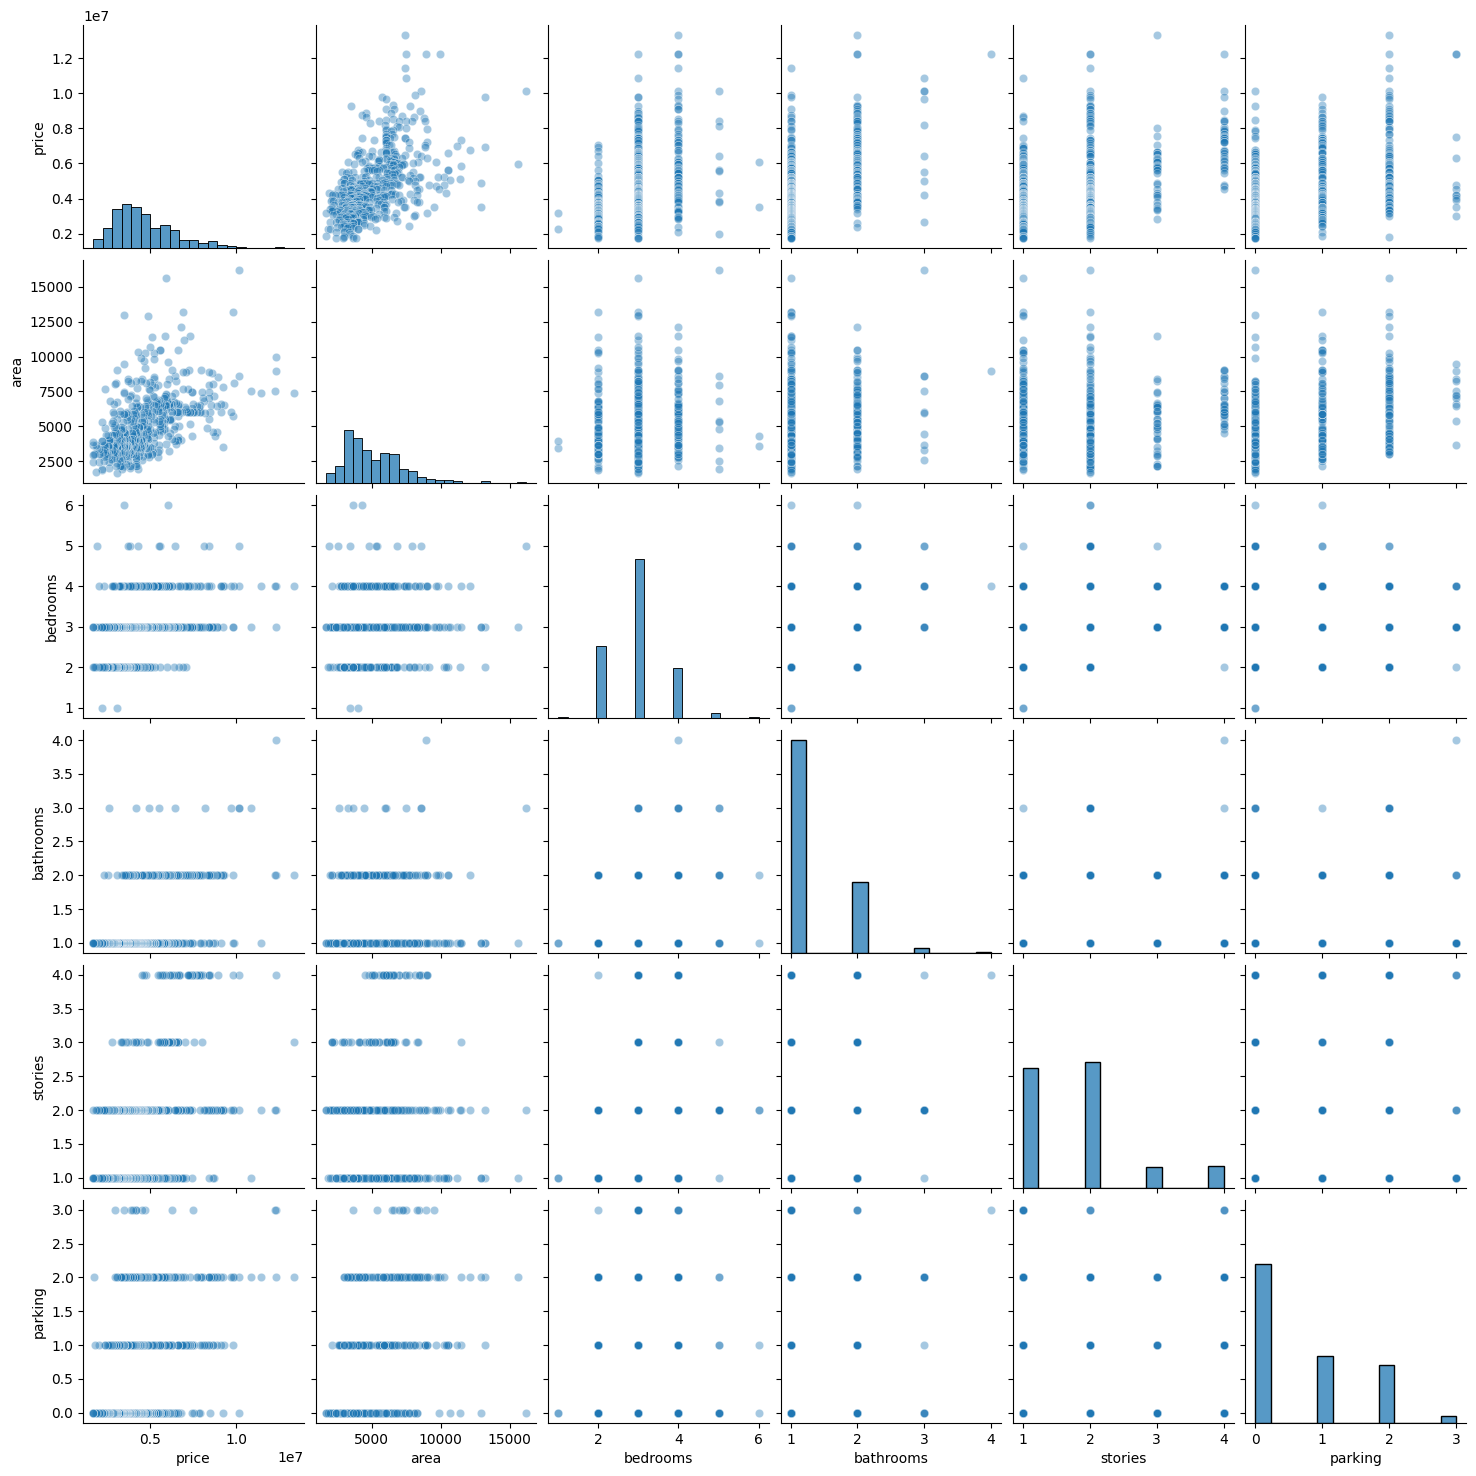

In [26]:
sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.4})

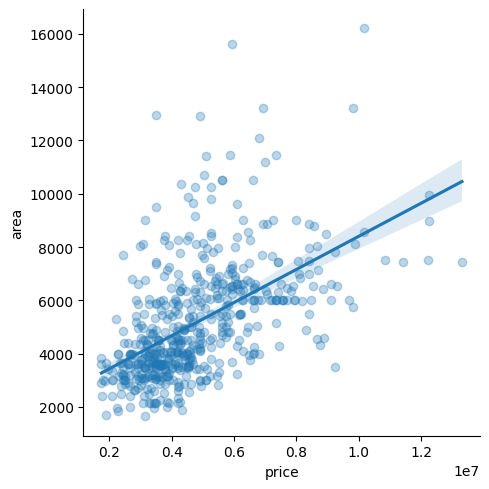

In [27]:
sns.lmplot(x="price",
           y = "area",
           data = df,
           scatter_kws={"alpha":0.3})

In [28]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
lm.coef_

array([3.29285878e+02, 1.61077479e+05, 1.19412059e+06, 4.72530548e+05,
       3.95480372e+05])

In [33]:
X_test

,area,bedrooms,bathrooms,stories,parking
316,5900,4,2,2,1
77,6500,3,2,3,0
360,4040,2,1,1,0
90,5000,3,1,2,0
493,3960,3,1,1,0
...,...,...,...,...,...
395,3600,6,1,2,1
425,3185,2,1,1,2
195,4410,4,3,2,2
452,9000,3,1,2,2


In [34]:
predictions = lm.predict(X_test)
predictions

array([6298756.24846019, 6412300.47281582, 3301998.04747401,
       4251720.51644364, 3436732.65583284, 4345561.67801563,
       5729237.00078621, 5603625.72829888, 3434049.71693511,
       3021832.45005373, 9715904.45985059, 3267093.74444814,
       3196626.56664122, 3626077.34899896, 3912556.06251311,
       6188840.04825674, 3102785.40506923, 4976486.76558918,
       4927093.88394881, 3947398.36757483, 5203367.32980418,
       4380136.69516389, 3173247.26933144, 4252057.83486376,
       6035810.18537662, 7870059.80450224, 2989176.46375167,
       4787269.35330295, 7742825.45586998, 3432071.28267169,
       5116555.23090542, 4028143.43809408, 6247657.53401459,
       4783517.20877162, 4338708.67255011, 5709607.12900996,
       4926114.05885851, 3813497.69777419, 3278675.43458365,
       4878208.93994066, 5551422.62688088, 3166990.837657  ,
       6385957.60260762, 4383772.18590474, 4194362.77577668,
       4305010.86319362, 6720188.08191883, 4689735.45061685,
       4622434.41665988,

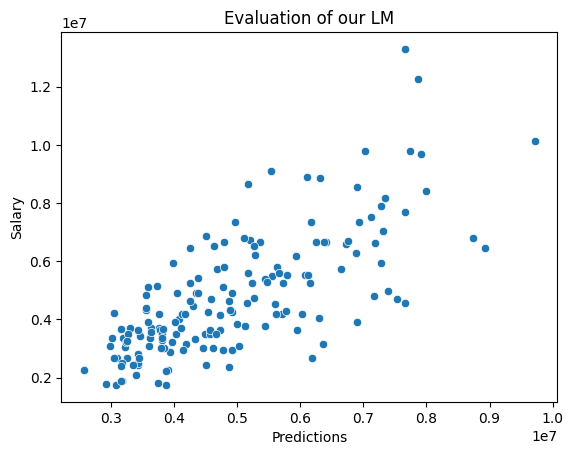

In [35]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("Predictions")
plt.ylabel("Salary")
plt.title("Evaluation of our LM")
plt.show()

In [36]:
#Evaluating error

print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Root Mean Square Error: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  1065137.8263727792
Mean Squared Error:  2044165115591.786
Root Mean Square Error:  1429743.02432003


In [37]:
# Residuals

residuals = y_test - predictions
residuals

316   -2.238756e+06
77     2.376995e+05
360    4.080020e+05
90     2.188279e+06
493   -6.367327e+05
           ...     
395   -1.169433e+06
425   -4.514194e+05
195   -2.427721e+06
452   -3.209825e+06
154   -2.622659e+05
Name: price, Length: 164, dtype: float64

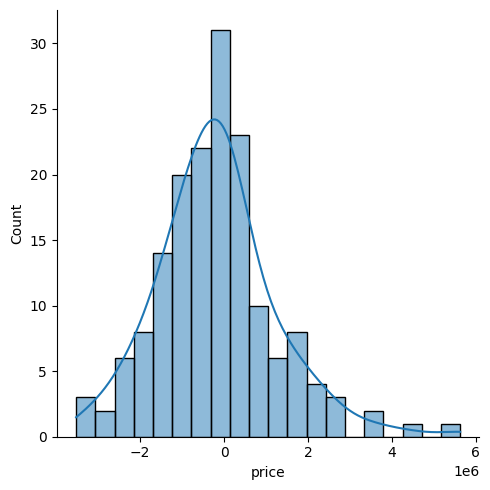

In [38]:
sns.displot(residuals, bins = 20, kde = True)

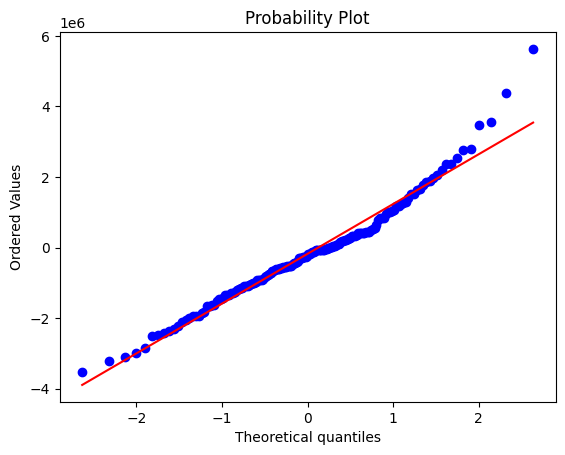

In [39]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()